In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.backend as K
import tensorflow as tf

import os
import pickle
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt

## **Downloading DataSet**

We use the dataset CIFAR100 for Multiclass Classification
 
* Batch_size: amount of samples that will be feed-forward in our model at once

* Img_width = 32, Img_height = 32, channels = 3 as RGB image


*   loss_function: compare predictions with ground truth during training
*   number of classes: 100


*  optimizer: method by which we update the weights of our neural network


In [4]:
num_classes = 100
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar100.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


##  **Network**

In [0]:
model = Sequential()

model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# training the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# **Model Fitting**

In [8]:
epochs = 50
num_predictions = 20
batch_size = 64
validations = []
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)
pickle.dump(validations, open("loss_validation.p",'wb'))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 63s 1ms/step - loss: 2.1612 - accuracy: 0.4467 - val_loss: 2.1108 - val_accuracy: 0.4639
Epoch 2/50
50000/50000 [==============================] - 63s 1ms/step - loss: 2.0398 - accuracy: 0.4723 - val_loss: 2.0401 - val_accuracy: 0.4722
Epoch 3/50
50000/50000 [==============================] - 63s 1ms/step - loss: 1.9221 - accuracy: 0.4950 - val_loss: 1.9920 - val_accuracy: 0.4933
Epoch 4/50
50000/50000 [==============================] - 63s 1ms/step - loss: 1.8114 - accuracy: 0.5202 - val_loss: 1.9699 - val_accuracy: 0.4927
Epoch 5/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.6899 - accuracy: 0.5494 - val_loss: 1.9667 - val_accuracy: 0.4923
Epoch 6/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.5766 - accuracy: 0.5765 - val_loss: 1.9137 - val_accuracy: 0.5073
Epoch 7/50
50000/50000 [==============================] - 62s 1ms/st

# **Plots for Categorical Cross Entropy Loss**

Also called Softmax Loss. It is a Softmax activation plus a Cross-Entropy loss. If we use this loss, we will train a CNN to output a probability over the 
C
 classes for each image. It is used for multi-class classification.

10000/10000 [==============================] - 5s 523us/step
Test loss: 2.1555932670593263 / Test accuracy: 0.5274999737739563


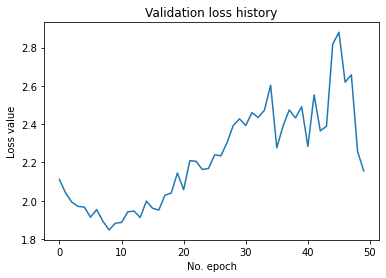

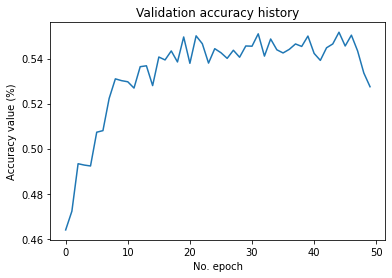

In [9]:
# model.evaluate(x=x_test, y=y_test)

# Generate generalization metrics
score = model.evaluate(x=x_test, y=y_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [0]:
ans=model.predict(x_test)

In [11]:
print(ans.shape)

(10000, 100)


In [0]:
final_label=np.zeros(10000)
gt=np.zeros(10000)

for i in range(10000):
  final_label[i]=np.argmax(ans[i,:])
  gt[i]=np.argmax(y_test[i,:])

In [13]:
count=0
for i in range(10000):
  if(gt[i]==final_label[i]):
    count=count+1

print("Test set accuracy:",count/10000)

Test set accuracy: 0.5275


In [0]:
def shuffle_weights(model, weights=None):
    weights = model.get_weights()
    weights = [np.random.permutation(w.flat).reshape(w.shape) for w in weights]
    model.set_weights(weights)

# **Training the model with mean squared logarithmic loss**

In [21]:
shuffle_weights(model)
model.compile(loss='mean_squared_logarithmic_error',
              optimizer=opt,
              metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=20,validation_data=(x_test, y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 63s 1ms/step - loss: 0.0047 - accuracy: 0.0619 - val_loss: 0.0046 - val_accuracy: 0.1335
Epoch 2/20
50000/50000 [==============================] - 63s 1ms/step - loss: 0.0046 - accuracy: 0.1358 - val_loss: 0.0044 - val_accuracy: 0.1968
Epoch 3/20
50000/50000 [==============================] - 63s 1ms/step - loss: 0.0044 - accuracy: 0.1914 - val_loss: 0.0042 - val_accuracy: 0.2454
Epoch 4/20
50000/50000 [==============================] - 63s 1ms/step - loss: 0.0042 - accuracy: 0.2427 - val_loss: 0.0040 - val_accuracy: 0.2827
Epoch 5/20
50000/50000 [==============================] - 63s 1ms/step - loss: 0.0041 - accuracy: 0.2796 - val_loss: 0.0039 - val_accuracy: 0.3196
Epoch 6/20
50000/50000 [==============================] - 63s 1ms/step - loss: 0.0039 - accuracy: 0.3167 - val_loss: 0.0038 - val_accuracy: 0.3382
Epoch 7/20
50000/50000 [==============================] - 63s 1ms/st

# **Plots for Mean Square Logarithmic Loss**

Mean squared logarithmic error (MSLE) can be interpreted as a measure of the ratio between the true and predicted values. Mean squared logarithmic error is, as the name suggests, a variation of the Mean Squared Error.


10000/10000 [==============================] - 5s 470us/step
Test loss: 0.003258741495758295 / Test accuracy: 0.4607999920845032


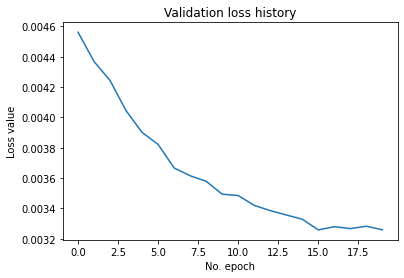

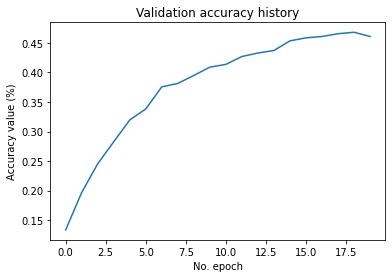

In [22]:
# Generate generalization metrics
score = model.evaluate(x=x_test, y=y_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [0]:
ans=model.predict(x_test)
final_label=np.zeros(10000)
gt=np.zeros(10000)

for i in range(10000):
  final_label[i]=np.argmax(ans[i,:])
  gt[i]=np.argmax(y_test[i,:])

In [24]:
count=0
for i in range(10000):
  if(gt[i]==final_label[i]):
    count=count+1

print("Test set accuracy:",count/10000)

Test set accuracy: 0.4608


In [0]:
def shuffle_weights(model, weights=None):
    weights = model.get_weights()
    weights = [np.random.permutation(w.flat).reshape(w.shape) for w in weights]
    model.set_weights(weights)

# **Using Hinge Loss for Training**

In [26]:
shuffle_weights(model)
model.compile(loss='hinge',
              optimizer=opt,
              metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=20,validation_data=(x_test, y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 63s 1ms/step - loss: 1.0098 - accuracy: 0.0101 - val_loss: 1.0098 - val_accuracy: 0.0100
Epoch 2/20
50000/50000 [==============================] - 62s 1ms/step - loss: 1.0098 - accuracy: 0.0099 - val_loss: 1.0098 - val_accuracy: 0.0100
Epoch 3/20
50000/50000 [==============================] - 62s 1ms/step - loss: 1.0098 - accuracy: 0.0106 - val_loss: 1.0097 - val_accuracy: 0.0160
Epoch 4/20
50000/50000 [==============================] - 63s 1ms/step - loss: 1.0095 - accuracy: 0.0235 - val_loss: 1.0095 - val_accuracy: 0.0240
Epoch 5/20
50000/50000 [==============================] - 63s 1ms/step - loss: 1.0094 - accuracy: 0.0320 - val_loss: 1.0093 - val_accuracy: 0.0369
Epoch 6/20
50000/50000 [==============================] - 63s 1ms/step - loss: 1.0093 - accuracy: 0.0361 - val_loss: 1.0093 - val_accuracy: 0.0341
Epoch 7/20
50000/50000 [==============================] - 62s 1ms/st

# **Plots for Hinge Loss**

Hinge loss is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

For an intended output t = ±1 and a classifier score y, the hinge loss of the prediction y is defined as

loss(y) = max(0, 1-t*y)

10000/10000 [==============================] - 5s 468us/step
Test loss: 1.008201333618164 / Test accuracy: 0.08969999849796295


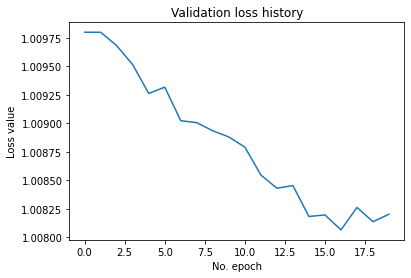

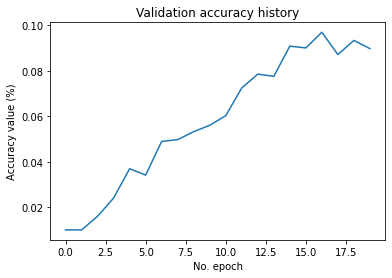

In [27]:
# Generate generalization metrics
score = model.evaluate(x=x_test, y=y_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [0]:
ans=model.predict(x_test)
final_label=np.zeros(10000)
gt=np.zeros(10000)

for i in range(10000):
  final_label[i]=np.argmax(ans[i,:])
  gt[i]=np.argmax(y_test[i,:])

In [29]:
count=0
for i in range(10000):
  if(gt[i]==final_label[i]):
    count=count+1

print("Test set accuracy:",count/10000)

Test set accuracy: 0.0897
